### Name: Onkar Santosh Potdar

### **Problem Statement:** The aim of the project is to build Abalone Age Prediction model using ML. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

* Name - Description


* Sex - M, F, and I (infant)

* Length - longest shell measurement (mm)

* Diameter - measured perpendicular to length (mm)

* Height - with meat in shell (mm)

* Whole- whole abalone weight (g)

* Shucked - weight of meat only (g)

* Viscera - gut weight, after bleeding (g)

* Shell - weight after being dried (g)

* Rings - +1.5 gives the age in years

### Importing Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

import joblib

### Importing Dataset

In [2]:
os.chdir("/content/drive/MyDrive")

df= pd.read_csv("abalone.csv")

df['Age']=df['Rings']+1.5

### Dataset Cleaning

#### checking Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


#### details of numerical columns

In [4]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings          Age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.000500      0.001500     1.000000     2.500000  
25%          0.093500      0.130000     8.000000     9.500000  
50%          0.171000      0.234000     9.000000    10.500000  
75%          0.253000      0.329000    11.000000    12.500000  
max          0.760000      1.005000    29.000000    30.500000

#### Unique values in each columns

In [5]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
Age                 28
dtype: int64

#### Unique values in each columns

In [6]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

#### checking null and NA Values

In [7]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

#### Histogram of each column

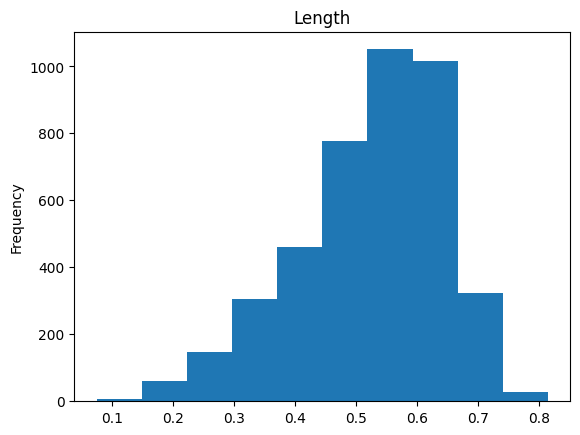

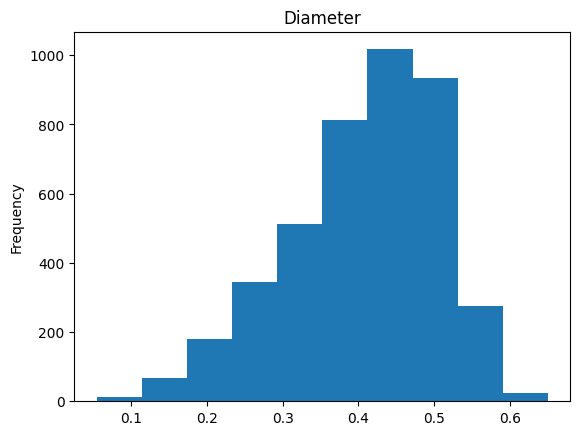

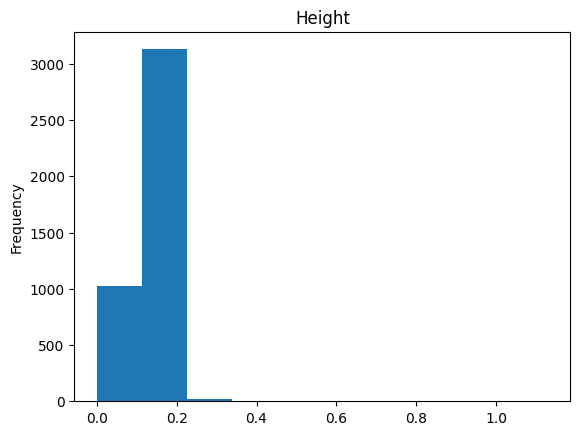

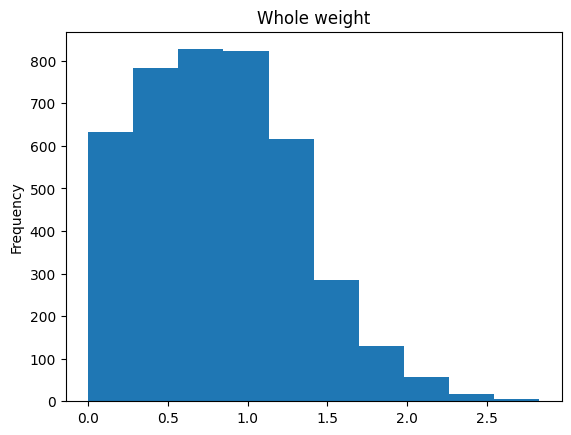

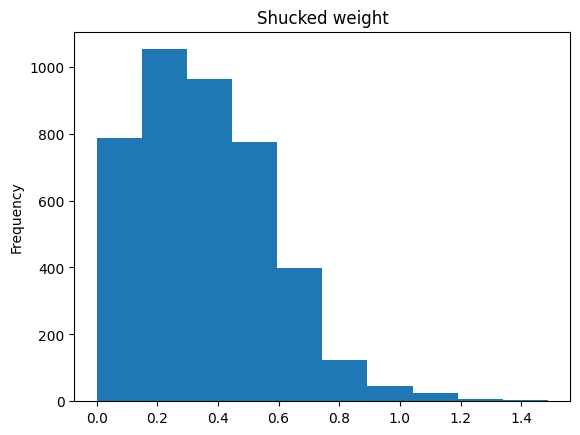

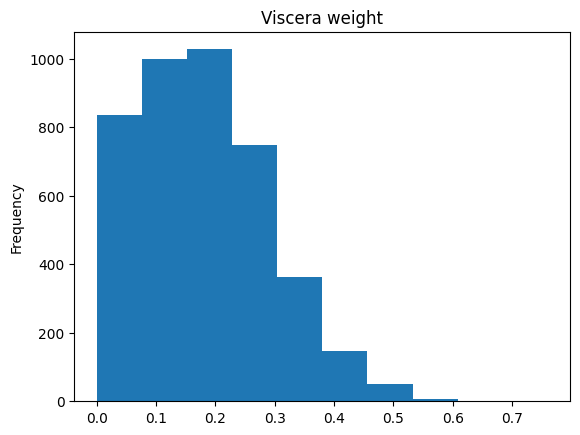

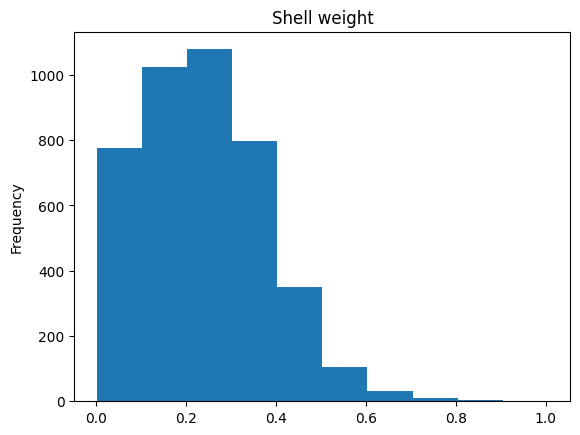

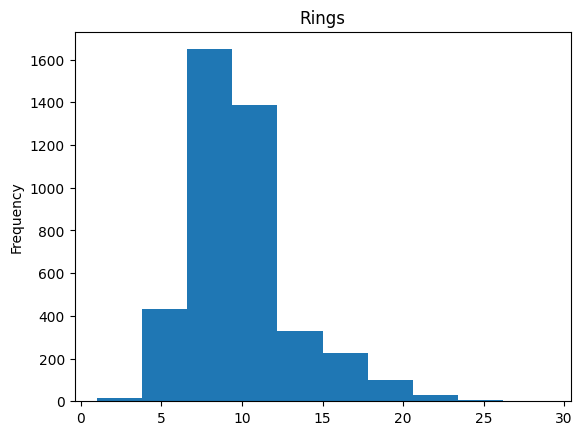

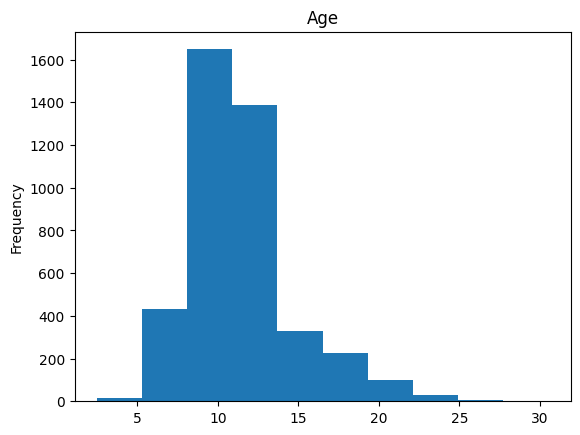

In [9]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure()
        plt.title(i)
        df[i].plot(kind='hist')
        plt.show()

#### Correlation of each column with heatmap

<ipython-input-10-9c5cc3bde407>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu_r")


<Axes: >

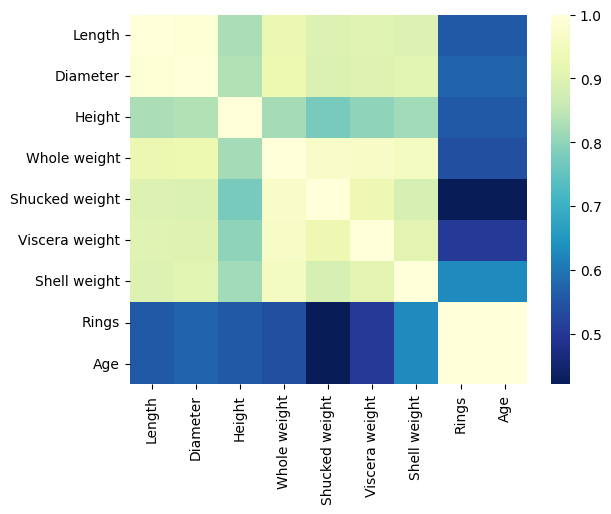

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu_r")

### Data Split X and Y

In [11]:
df_dum = pd.get_dummies(df,drop_first=True)

x = df_dum.drop(["Age","Rings"],axis=1)
y = df_dum["Age"] #

#### PolynomialFeatures

In [12]:
scaler = MinMaxScaler()

poly = PolynomialFeatures(degree=2)

poly_x = poly.fit_transform(x)

scl_x = scaler.fit_transform(poly_x)

df_x = pd.DataFrame(scl_x,columns=poly.get_feature_names_out())

### Data Split in train,test and validation (70:15:15)

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(df_x,y,
                                           test_size=0.3,
                                           random_state=2023)

xval,xtest,yval,ytest=train_test_split(xtest,ytest,
                                           test_size=0.5,
                                           random_state=2023)

### Models

In [14]:
lr = LinearRegression()
en = ElasticNet(random_state=2023)
clf = DecisionTreeRegressor(random_state=2023)
rlr = Ridge(random_state=2023)
llr = Lasso(random_state=2023)
xgb = XGBRegressor(random_state=2023)
svr = SVR()
sgd = SGDRegressor(random_state=2023)

kfold=KFold(n_splits=5,shuffle=True, random_state=2023)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### LinearRegression

In [16]:
lr.fit(xtrain,ytrain)

y_pred = lr.predict(xtest)

r2_lr=r2_score(ytest, y_pred)

print("LinearRegression:",r2_lr)

LinearRegression: 0.5312591805129299


#### ElasticNet

In [17]:
en.fit(xtrain,ytrain)

y_pred = en.predict(xtest)

r2_en=r2_score(ytest, y_pred)

print("ElasticNet: ", r2_en)

ElasticNet:  0.0346238287906977


#### DecisionTreeRegressor

In [18]:
clf.fit(xtrain,ytrain)

y_pred = clf.predict(xtest)

r2_clf=r2_score(ytest, y_pred)

print("DecisionTreeRegressor: ",r2_clf)

DecisionTreeRegressor:  -0.00034154256695839713


#### Ridge

In [19]:
rlr.fit(xtrain,ytrain)

y_pred = rlr.predict(xtest)

r2_rlr=r2_score(ytest, y_pred)

print("Ridge: ",r2_rlr)

Ridge:  0.5277261369401942


#### Lasso

In [20]:
llr.fit(xtrain,ytrain)

y_pred = llr.predict(xtest)

r2_llr=r2_score(ytest, y_pred)

print("Lasso: ",r2_llr)

Lasso:  -0.013177889066887882


#### XGBRegressor

In [21]:
xgb.fit(xtrain,ytrain)

y_pred = xgb.predict(xtest)

r2_xgb=r2_score(ytest, y_pred)

print("XGBRegressor: ",r2_xgb)

XGBRegressor:  0.4680460387204399


#### SVR

In [22]:
svr.fit(xtrain,ytrain)

y_pred = svr.predict(xtest)

r2_svr=r2_score(ytest, y_pred)

print("SVR: ",r2_svr)

SVR:  0.5071645405406082


#### SGDRegressor

In [23]:
sgd.fit(xtrain,ytrain)

y_pred = sgd.predict(xtest)

r2_sgd=r2_score(ytest, y_pred)

print("SGDRegressor:",r2_sgd)

SGDRegressor: 0.49515625770814886


#### GradientBoosting

In [24]:
gbm = GradientBoostingRegressor(random_state=2022)

params = {'learning_rate':np.linspace(0.001, 0.5,10),
          'max_depth':[2,3,4,5,6],
          'n_estimators': [50,100,150]}

gcv_gbm = GridSearchCV(gbm, param_grid=params,cv=kfold,scoring='r2',verbose=1)

gcv_gbm.fit(x,y)

print("GradientBoosting: ",gcv_gbm.best_params_)

print("GradientBoosting: ",gcv_gbm.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
GradientBoosting:  {'learning_rate': 0.16733333333333333, 'max_depth': 4, 'n_estimators': 50}
GradientBoosting:  0.5517230715290673


#### RandomForestRegressor

In [25]:
rfr = RandomForestRegressor(random_state=2022)

params = {"max_features":[2,3,4,5,6]}

gcv_rfr = GridSearchCV(rfr, param_grid=params,cv=kfold,scoring='r2',verbose=1)

gcv_rfr.fit(x,y)

print("RandomForestRegressor: ",gcv_rfr.best_params_)

print("RandomForestRegressor: ",gcv_rfr.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RandomForestRegressor:  {'max_features': 3}
RandomForestRegressor:  0.553027597613034


#### ENSEMBLED VOTING METHOD

#### voting without weight

In [26]:
models = [("xgb",xgb),("rlr",rlr),("sgd",sgd)]

voting = VotingRegressor(models,verbose=1)

voting.fit(xtrain,ytrain)

y_pred = voting.predict(xtest)

r2_vwow=r2_score(ytest, y_pred)

print("voting without weight: ",r2_vwow)

[Voting] ...................... (1 of 3) Processing xgb, total=   1.6s
[Voting] ...................... (2 of 3) Processing rlr, total=   0.0s
[Voting] ...................... (3 of 3) Processing sgd, total=   0.1s
voting without weight:  0.5404512984929924


#### voting with weight

In [27]:
voting = VotingRegressor(models,weights=np.array([r2_xgb,r2_rlr,r2_sgd]),verbose=1)

voting.fit(xtrain,ytrain)

y_pred = voting.predict(xtest)

r2_vww=r2_score(ytest, y_pred)

print("voting with weight: ",r2_vww)

[Voting] ...................... (1 of 3) Processing xgb, total=   2.5s
[Voting] ...................... (2 of 3) Processing rlr, total=   0.0s
[Voting] ...................... (3 of 3) Processing sgd, total=   0.1s
voting with weight:  0.5404294026366285


#### ENSEMBLED BAGGING METHOD

#### Bagging

In [28]:
bag=BaggingRegressor(base_estimator=rlr,random_state=2022)

params= {'base_estimator__alpha': np.linspace(0.01,1000)}

gcv=GridSearchCV(bag, param_grid=params,cv=kfold,scoring='r2',verbose=3)

gcv.fit(x,y)

print("Bagging: ",gcv.best_params_)

print("Bagging: ",gcv.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........base_estimator__alpha=0.01;, score=0.479 total time=   0.0s
[CV 2/5] END ........base_estimator__alpha=0.01;, score=0.504 total time=   0.0s
[CV 3/5] END ........base_estimator__alpha=0.01;, score=0.543 total time=   0.0s
[CV 4/5] END ........base_estimator__alpha=0.01;, score=0.555 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END ........base_estimator__alpha=0.01;, score=0.552 total time=   0.0s
[CV 1/5] END base_estimator__alpha=20.41795918367347;, score=0.400 total time=   0.0s
[CV 2/5] END base_estimator__alpha=20.41795918367347;, score=0.456 total time=   0.0s
[CV 3/5] END base_estimator__alpha=20.41795918367347;, score=0.447 total time=   0.0s
[CV 4/5] END base_estimator__alpha=20.41795918367347;, score=0.450 total time=   0.0s
[CV 5/5] END base_estimator__alpha=20.41795918367347;, score=0.462 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 1/5] END base_estimator__alpha=40.82591836734694;, score=0.357 total time=   0.0s
[CV 2/5] END base_estimator__alpha=40.82591836734694;, score=0.413 total time=   0.0s
[CV 3/5] END base_estimator__alpha=40.82591836734694;, score=0.404 total time=   0.1s
[CV 4/5] END base_estimator__alpha=40.82591836734694;, score=0.408 total time=   0.0s
[CV 5/5] END base_estimator__alpha=40.82591836734694;, score=0.418 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=61.233877551020406;, score=0.335 total time=   0.1s
[CV 2/5] END base_estimator__alpha=61.233877551020406;, score=0.390 total time=   0.0s
[CV 3/5] END base_estimator__alpha=61.233877551020406;, score=0.382 total time=   0.0s
[CV 4/5] END base_estimator__alpha=61.233877551020406;, score=0.386 total time=   0.1s
[CV 5/5] END base_estimator__alpha=61.233877551020406;, score=0.395 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=81.64183673469388;, score=0.322 total time=   0.0s
[CV 2/5] END base_estimator__alpha=81.64183673469388;, score=0.376 total time=   0.0s
[CV 3/5] END base_estimator__alpha=81.64183673469388;, score=0.368 total time=   0.0s
[CV 4/5] END base_estimator__alpha=81.64183673469388;, score=0.373 total time=   0.0s
[CV 5/5] END base_estimator__alpha=81.64183673469388;, score=0.381 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=102.04979591836735;, score=0.314 total time=   0.1s
[CV 2/5] END base_estimator__alpha=102.04979591836735;, score=0.366 total time=   0.1s
[CV 3/5] END base_estimator__alpha=102.04979591836735;, score=0.358 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=102.04979591836735;, score=0.364 total time=   0.1s
[CV 5/5] END base_estimator__alpha=102.04979591836735;, score=0.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=122.45775510204082;, score=0.308 total time=   0.1s
[CV 2/5] END base_estimator__alpha=122.45775510204082;, score=0.359 total time=   0.1s
[CV 3/5] END base_estimator__alpha=122.45775510204082;, score=0.351 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=122.45775510204082;, score=0.357 total time=   0.1s
[CV 5/5] END base_estimator__alpha=122.45775510204082;, score=0.364 total time=   0.1s
[CV 1/5] END base_estimator__alpha=142.86571428571426;, score=0.304 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=142.86571428571426;, score=0.353 total time=   0.1s
[CV 3/5] END base_estimator__alpha=142.86571428571426;, score=0.345 total time=   0.1s
[CV 4/5] END base_estimator__alpha=142.86571428571426;, score=0.351 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=142.86571428571426;, score=0.359 total time=   0.1s
[CV 1/5] END base_estimator__alpha=163.27367346938775;, score=0.300 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=163.27367346938775;, score=0.348 total time=   0.1s
[CV 3/5] END base_estimator__alpha=163.27367346938775;, score=0.340 total time=   0.1s
[CV 4/5] END base_estimator__alpha=163.27367346938775;, score=0.346 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



[CV 5/5] END base_estimator__alpha=163.27367346938775;, score=0.354 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=183.68163265306123;, score=0.297 total time=   0.1s
[CV 2/5] END base_estimator__alpha=183.68163265306123;, score=0.344 total time=   0.1s
[CV 3/5] END base_estimator__alpha=183.68163265306123;, score=0.336 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=183.68163265306123;, score=0.342 total time=   0.1s
[CV 5/5] END base_estimator__alpha=183.68163265306123;, score=0.350 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=204.08959183673468;, score=0.295 total time=   0.1s
[CV 2/5] END base_estimator__alpha=204.08959183673468;, score=0.341 total time=   0.0s
[CV 3/5] END base_estimator__alpha=204.08959183673468;, score=0.332 total time=   0.0s
[CV 4/5] END base_estimator__alpha=204.08959183673468;, score=0.339 total time=   0.0s
[CV 5/5] END base_estimator__alpha=204.08959183673468;, score=0.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=224.49755102040814;, score=0.293 total time=   0.1s
[CV 2/5] END base_estimator__alpha=224.49755102040814;, score=0.338 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=224.49755102040814;, score=0.329 total time=   0.1s
[CV 4/5] END base_estimator__alpha=224.49755102040814;, score=0.336 total time=   0.1s
[CV 5/5] END base_estimator__alpha=224.49755102040814;, score=0.343 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=244.90551020408162;, score=0.291 total time=   0.1s
[CV 2/5] END base_estimator__alpha=244.90551020408162;, score=0.335 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=244.90551020408162;, score=0.326 total time=   0.2s
[CV 4/5] END base_estimator__alpha=244.90551020408162;, score=0.333 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=244.90551020408162;, score=0.340 total time=   0.1s
[CV 1/5] END base_estimator__alpha=265.3134693877551;, score=0.290 total time=   0.1s
[CV 2/5] END base_estimator__alpha=265.3134693877551;, score=0.332 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=265.3134693877551;, score=0.323 total time=   0.1s
[CV 4/5] END base_estimator__alpha=265.3134693877551;, score=0.330 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=265.3134693877551;, score=0.338 total time=   0.1s
[CV 1/5] END base_estimator__alpha=285.72142857142853;, score=0.288 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=285.72142857142853;, score=0.330 total time=   0.1s
[CV 3/5] END base_estimator__alpha=285.72142857142853;, score=0.320 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=285.72142857142853;, score=0.328 total time=   0.1s
[CV 5/5] END base_estimator__alpha=285.72142857142853;, score=0.335 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=306.129387755102;, score=0.287 total time=   0.2s
[CV 2/5] END base_estimator__alpha=306.129387755102;, score=0.328 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=306.129387755102;, score=0.318 total time=   0.2s
[CV 4/5] END base_estimator__alpha=306.129387755102;, score=0.325 total time=   0.2s
[CV 5/5] END base_estimator__alpha=306.129387755102;, score=0.333 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=326.5373469387755;, score=0.286 total time=   0.1s
[CV 2/5] END base_estimator__alpha=326.5373469387755;, score=0.325 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=326.5373469387755;, score=0.315 total time=   0.1s
[CV 4/5] END base_estimator__alpha=326.5373469387755;, score=0.323 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=326.5373469387755;, score=0.331 total time=   0.2s
[CV 1/5] END base_estimator__alpha=346.945306122449;, score=0.285 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=346.945306122449;, score=0.323 total time=   0.1s
[CV 3/5] END base_estimator__alpha=346.945306122449;, score=0.313 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=346.945306122449;, score=0.321 total time=   0.1s
[CV 5/5] END base_estimator__alpha=346.945306122449;, score=0.329 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=367.35326530612247;, score=0.283 total time=   0.1s
[CV 2/5] END base_estimator__alpha=367.35326530612247;, score=0.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=367.35326530612247;, score=0.311 total time=   0.1s
[CV 4/5] END base_estimator__alpha=367.35326530612247;, score=0.319 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=367.35326530612247;, score=0.326 total time=   0.1s
[CV 1/5] END base_estimator__alpha=387.7612244897959;, score=0.282 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=387.7612244897959;, score=0.319 total time=   0.1s
[CV 3/5] END base_estimator__alpha=387.7612244897959;, score=0.309 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=387.7612244897959;, score=0.317 total time=   0.1s
[CV 5/5] END base_estimator__alpha=387.7612244897959;, score=0.324 total time=   0.1s
[CV 1/5] END base_estimator__alpha=408.1691836734694;, score=0.281 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=408.1691836734694;, score=0.317 total time=   0.1s
[CV 3/5] END base_estimator__alpha=408.1691836734694;, score=0.307 total time=   0.1s
[CV 4/5] END base_estimator__alpha=408.1691836734694;, score=0.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=408.1691836734694;, score=0.322 total time=   0.1s
[CV 1/5] END base_estimator__alpha=428.57714285714286;, score=0.280 total time=   0.1s
[CV 2/5] END base_estimator__alpha=428.57714285714286;, score=0.316 total time=   0.1s
[CV 3/5] END base_estimator__alpha=428.57714285714286;, score=0.305 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=428.57714285714286;, score=0.313 total time=   0.0s
[CV 5/5] END base_estimator__alpha=428.57714285714286;, score=0.321 total time=   0.0s
[CV 1/5] END base_estimator__alpha=448.9851020408163;, score=0.279 total time=   0.0s
[CV 2/5] END base_estimator__alpha=448.9851020408163;, score=0.314 total time=   0.0s
[CV 3/5] END base_estimator__alpha=448.9851020408163;, score=0.303 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=448.9851020408163;, score=0.311 total time=   0.0s
[CV 5/5] END base_estimator__alpha=448.9851020408163;, score=0.319 total time=   0.0s
[CV 1/5] END base_estimator__alpha=469.39306122448977;, score=0.278 total time=   0.0s
[CV 2/5] END base_estimator__alpha=469.39306122448977;, score=0.312 total time=   0.0s
[CV 3/5] END base_estimator__alpha=469.39306122448977;, score=0.301 total time=   0.0s
[CV 4/5] END base_estimator__alpha=469.39306122448977;, score=0.309 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 5/5] END base_estimator__alpha=469.39306122448977;, score=0.317 total time=   0.0s
[CV 1/5] END base_estimator__alpha=489.80102040816325;, score=0.277 total time=   0.0s
[CV 2/5] END base_estimator__alpha=489.80102040816325;, score=0.310 total time=   0.0s
[CV 3/5] END base_estimator__alpha=489.80102040816325;, score=0.299 total time=   0.0s
[CV 4/5] END base_estimator__alpha=489.80102040816325;, score=0.307 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=489.80102040816325;, score=0.315 total time=   0.0s
[CV 1/5] END base_estimator__alpha=510.20897959183674;, score=0.276 total time=   0.0s
[CV 2/5] END base_estimator__alpha=510.20897959183674;, score=0.308 total time=   0.0s
[CV 3/5] END base_estimator__alpha=510.20897959183674;, score=0.297 total time=   0.0s
[CV 4/5] END base_estimator__alpha=510.20897959183674;, score=0.305 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=510.20897959183674;, score=0.313 total time=   0.0s
[CV 1/5] END base_estimator__alpha=530.6169387755102;, score=0.275 total time=   0.0s
[CV 2/5] END base_estimator__alpha=530.6169387755102;, score=0.307 total time=   0.0s
[CV 3/5] END base_estimator__alpha=530.6169387755102;, score=0.295 total time=   0.0s
[CV 4/5] END base_estimator__alpha=530.6169387755102;, score=0.304 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=530.6169387755102;, score=0.311 total time=   0.0s
[CV 1/5] END base_estimator__alpha=551.0248979591837;, score=0.274 total time=   0.0s
[CV 2/5] END base_estimator__alpha=551.0248979591837;, score=0.305 total time=   0.0s
[CV 3/5] END base_estimator__alpha=551.0248979591837;, score=0.294 total time=   0.1s
[CV 4/5] END base_estimator__alpha=551.0248979591837;, score=0.302 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=551.0248979591837;, score=0.310 total time=   0.0s
[CV 1/5] END base_estimator__alpha=571.4328571428571;, score=0.273 total time=   0.0s
[CV 2/5] END base_estimator__alpha=571.4328571428571;, score=0.303 total time=   0.0s
[CV 3/5] END base_estimator__alpha=571.4328571428571;, score=0.292 total time=   0.0s
[CV 4/5] END base_estimator__alpha=571.4328571428571;, score=0.300 total time=   0.0s
[CV 5/5] END base_estimator__alpha=571.4328571428571;, score=0.308 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



[CV 1/5] END base_estimator__alpha=591.8408163265306;, score=0.272 total time=   0.0s
[CV 2/5] END base_estimator__alpha=591.8408163265306;, score=0.302 total time=   0.0s
[CV 3/5] END base_estimator__alpha=591.8408163265306;, score=0.290 total time=   0.0s
[CV 4/5] END base_estimator__alpha=591.8408163265306;, score=0.298 total time=   0.0s
[CV 5/5] END base_estimator__alpha=591.8408163265306;, score=0.306 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 1/5] END base_estimator__alpha=612.248775510204;, score=0.271 total time=   0.0s
[CV 2/5] END base_estimator__alpha=612.248775510204;, score=0.300 total time=   0.0s
[CV 3/5] END base_estimator__alpha=612.248775510204;, score=0.288 total time=   0.0s
[CV 4/5] END base_estimator__alpha=612.248775510204;, score=0.297 total time=   0.0s
[CV 5/5] END base_estimator__alpha=612.248775510204;, score=0.305 total time=   0.0s
[CV 1/5] END base_estimator__alpha=632.6567346938775;, score=0.270 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 2/5] END base_estimator__alpha=632.6567346938775;, score=0.298 total time=   0.0s
[CV 3/5] END base_estimator__alpha=632.6567346938775;, score=0.287 total time=   0.0s
[CV 4/5] END base_estimator__alpha=632.6567346938775;, score=0.295 total time=   0.0s
[CV 5/5] END base_estimator__alpha=632.6567346938775;, score=0.303 total time=   0.0s
[CV 1/5] END base_estimator__alpha=653.064693877551;, score=0.269 total time=   0.0s
[CV 2/5] END base_estimator__alpha=653.064693877551;, score=0.297 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 3/5] END base_estimator__alpha=653.064693877551;, score=0.285 total time=   0.1s
[CV 4/5] END base_estimator__alpha=653.064693877551;, score=0.293 total time=   0.0s
[CV 5/5] END base_estimator__alpha=653.064693877551;, score=0.301 total time=   0.0s
[CV 1/5] END base_estimator__alpha=673.4726530612245;, score=0.268 total time=   0.0s
[CV 2/5] END base_estimator__alpha=673.4726530612245;, score=0.295 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=673.4726530612245;, score=0.283 total time=   0.1s
[CV 4/5] END base_estimator__alpha=673.4726530612245;, score=0.292 total time=   0.0s
[CV 5/5] END base_estimator__alpha=673.4726530612245;, score=0.300 total time=   0.0s
[CV 1/5] END base_estimator__alpha=693.880612244898;, score=0.267 total time=   0.0s
[CV 2/5] END base_estimator__alpha=693.880612244898;, score=0.294 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=693.880612244898;, score=0.282 total time=   0.0s
[CV 4/5] END base_estimator__alpha=693.880612244898;, score=0.290 total time=   0.0s
[CV 5/5] END base_estimator__alpha=693.880612244898;, score=0.298 total time=   0.0s
[CV 1/5] END base_estimator__alpha=714.2885714285715;, score=0.266 total time=   0.0s
[CV 2/5] END base_estimator__alpha=714.2885714285715;, score=0.292 total time=   0.0s
[CV 3/5] END base_estimator__alpha=714.2885714285715;, score=0.280 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 4/5] END base_estimator__alpha=714.2885714285715;, score=0.289 total time=   0.1s
[CV 5/5] END base_estimator__alpha=714.2885714285715;, score=0.297 total time=   0.0s
[CV 1/5] END base_estimator__alpha=734.6965306122449;, score=0.264 total time=   0.0s
[CV 2/5] END base_estimator__alpha=734.6965306122449;, score=0.291 total time=   0.0s
[CV 3/5] END base_estimator__alpha=734.6965306122449;, score=0.279 total time=   0.0s
[CV 4/5] END base_estimator__alpha=734.6965306122449;, score=0.287 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=734.6965306122449;, score=0.295 total time=   0.1s
[CV 1/5] END base_estimator__alpha=755.1044897959183;, score=0.263 total time=   0.0s
[CV 2/5] END base_estimator__alpha=755.1044897959183;, score=0.289 total time=   0.0s
[CV 3/5] END base_estimator__alpha=755.1044897959183;, score=0.277 total time=   0.0s
[CV 4/5] END base_estimator__alpha=755.1044897959183;, score=0.286 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=755.1044897959183;, score=0.293 total time=   0.0s
[CV 1/5] END base_estimator__alpha=775.5124489795918;, score=0.262 total time=   0.1s
[CV 2/5] END base_estimator__alpha=775.5124489795918;, score=0.288 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=775.5124489795918;, score=0.275 total time=   0.0s
[CV 4/5] END base_estimator__alpha=775.5124489795918;, score=0.284 total time=   0.0s
[CV 5/5] END base_estimator__alpha=775.5124489795918;, score=0.292 total time=   0.0s
[CV 1/5] END base_estimator__alpha=795.9204081632653;, score=0.261 total time=   0.0s
[CV 2/5] END base_estimator__alpha=795.9204081632653;, score=0.286 total time=   0.0s
[CV 3/5] END base_estimator__alpha=795.9204081632653;, score=0.274 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 4/5] END base_estimator__alpha=795.9204081632653;, score=0.282 total time=   0.0s
[CV 5/5] END base_estimator__alpha=795.9204081632653;, score=0.290 total time=   0.0s
[CV 1/5] END base_estimator__alpha=816.3283673469388;, score=0.260 total time=   0.0s
[CV 2/5] END base_estimator__alpha=816.3283673469388;, score=0.285 total time=   0.0s
[CV 3/5] END base_estimator__alpha=816.3283673469388;, score=0.272 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=816.3283673469388;, score=0.281 total time=   0.0s
[CV 5/5] END base_estimator__alpha=816.3283673469388;, score=0.289 total time=   0.0s
[CV 1/5] END base_estimator__alpha=836.7363265306122;, score=0.259 total time=   0.0s
[CV 2/5] END base_estimator__alpha=836.7363265306122;, score=0.283 total time=   0.0s
[CV 3/5] END base_estimator__alpha=836.7363265306122;, score=0.271 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/5] END base_estimator__alpha=836.7363265306122;, score=0.279 total time=   0.1s
[CV 5/5] END base_estimator__alpha=836.7363265306122;, score=0.287 total time=   0.0s
[CV 1/5] END base_estimator__alpha=857.1442857142857;, score=0.258 total time=   0.0s
[CV 2/5] END base_estimator__alpha=857.1442857142857;, score=0.282 total time=   0.0s
[CV 3/5] END base_estimator__alpha=857.1442857142857;, score=0.269 total time=   0.0s
[CV 4/5] END base_estimator__alpha=857.1442857142857;, score=0.278 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/5] END base_estimator__alpha=857.1442857142857;, score=0.286 total time=   0.0s
[CV 1/5] END base_estimator__alpha=877.5522448979592;, score=0.257 total time=   0.0s
[CV 2/5] END base_estimator__alpha=877.5522448979592;, score=0.280 total time=   0.0s
[CV 3/5] END base_estimator__alpha=877.5522448979592;, score=0.268 total time=   0.1s
[CV 4/5] END base_estimator__alpha=877.5522448979592;, score=0.277 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 5/5] END base_estimator__alpha=877.5522448979592;, score=0.284 total time=   0.0s
[CV 1/5] END base_estimator__alpha=897.9602040816326;, score=0.256 total time=   0.0s
[CV 2/5] END base_estimator__alpha=897.9602040816326;, score=0.279 total time=   0.0s
[CV 3/5] END base_estimator__alpha=897.9602040816326;, score=0.266 total time=   0.0s
[CV 4/5] END base_estimator__alpha=897.9602040816326;, score=0.275 total time=   0.0s
[CV 5/5] END base_estimator__alpha=897.9602040816326;, score=0.283 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/5] END base_estimator__alpha=918.3681632653061;, score=0.255 total time=   0.0s
[CV 2/5] END base_estimator__alpha=918.3681632653061;, score=0.278 total time=   0.0s
[CV 3/5] END base_estimator__alpha=918.3681632653061;, score=0.265 total time=   0.0s
[CV 4/5] END base_estimator__alpha=918.3681632653061;, score=0.274 total time=   0.0s
[CV 5/5] END base_estimator__alpha=918.3681632653061;, score=0.281 total time=   0.0s
[CV 1/5] END base_estimator__alpha=938.7761224489795;, score=0.254 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=938.7761224489795;, score=0.276 total time=   0.0s
[CV 3/5] END base_estimator__alpha=938.7761224489795;, score=0.264 total time=   0.0s
[CV 4/5] END base_estimator__alpha=938.7761224489795;, score=0.272 total time=   0.1s
[CV 5/5] END base_estimator__alpha=938.7761224489795;, score=0.280 total time=   0.0s
[CV 1/5] END base_estimator__alpha=959.184081632653;, score=0.253 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/5] END base_estimator__alpha=959.184081632653;, score=0.275 total time=   0.0s
[CV 3/5] END base_estimator__alpha=959.184081632653;, score=0.262 total time=   0.0s
[CV 4/5] END base_estimator__alpha=959.184081632653;, score=0.271 total time=   0.0s
[CV 5/5] END base_estimator__alpha=959.184081632653;, score=0.279 total time=   0.0s
[CV 1/5] END base_estimator__alpha=979.5920408163265;, score=0.252 total time=   0.0s
[CV 2/5] END base_estimator__alpha=979.5920408163265;, score=0.273 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END base_estimator__alpha=979.5920408163265;, score=0.261 total time=   0.1s
[CV 4/5] END base_estimator__alpha=979.5920408163265;, score=0.269 total time=   0.0s
[CV 5/5] END base_estimator__alpha=979.5920408163265;, score=0.277 total time=   0.1s
[CV 1/5] END ......base_estimator__alpha=1000.0;, score=0.251 total time=   0.0s
[CV 2/5] END ......base_estimator__alpha=1000.0;, score=0.272 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/5] END ......base_estimator__alpha=1000.0;, score=0.259 total time=   0.0s
[CV 4/5] END ......base_estimator__alpha=1000.0;, score=0.268 total time=   0.0s
[CV 5/5] END ......base_estimator__alpha=1000.0;, score=0.276 total time=   0.0s
Bagging:  {'base_estimator__alpha': 0.01}
Bagging:  0.526499329477768


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### ENSEMBLED STACKING METHOD

#### StackingRegressor

In [29]:
stack=StackingRegressor(estimators=models,final_estimator=rfr,passthrough=True)

stack.fit(xtrain,ytrain)

y_pred=stack.predict(xtest)

r2_st=r2_score(ytest, y_pred)

print("StackingRegressor: ",r2_st)

StackingRegressor:  0.5174758648472335


### Saving the Best Model

In [30]:
joblib.dump(lr,'abalone_model')

['abalone_model']